#EDA -1

In [2]:
import urllib.request as ur
import pandas as pd
url = f"https://drive.usercontent.google.com/u/0/uc?id=1iKy23bMtEQShF_weneRNnYrFmzvpPOI3&export=download"

ur.urlretrieve(url,"bikedetail.csv")

df=pd.read_csv("bikedetail.csv")


In [3]:
df[df.duplicated()]

name  selling_price  year seller_type      owner  \
231     TVS Apache RTR 200 4V          95000  2018  Individual  1st owner   
508       Bajaj Pulsar 135 LS          20000  2010  Individual  1st owner   
522         Bajaj Platina 100          20000  2012  Individual  1st owner   
605  Hero Karizma [2003-2014]          50000  2013  Individual  1st owner   
607      Honda CB Hornet 160R          70000  2017  Individual  1st owner   
773  Honda Activa [2000-2015]          23000  2009  Individual  1st owner   

     km_driven  ex_showroom_price  
231       9600                NaN  
508      80000            64589.0  
522      16295                NaN  
605      38000            85766.0  
607      35000            87719.0  
773      95000            50267.0

In [4]:
df.drop_duplicates(inplace = True)

In [5]:
df.shape

(1055, 7)

In [6]:
df["selling_price"].dtypes
#1
5000 - 760000
f'''{df["selling_price"].min()} - {df["selling_price"].max()}'''


'5000 - 760000'

In [7]:
#2
#45000
df["selling_price"].median()

45000.0

In [8]:
#3 most common seller type
#individual
df["seller_type"].mode()

0    Individual
Name: seller_type, dtype: object

In [9]:
df[df["km_driven"]>50000]["name"].count()
#4 how many bikes more than 50k km
#168bikes

np.int64(168)

In [10]:
#5 What is the average km_driven value for each ownership type

df.groupby(["owner"]).agg({"km_driven" : "mean"})

km_driven
owner                   
1st owner   32732.710240
2nd owner   39288.991870
3rd owner   33292.181818
4th owner  311500.000000

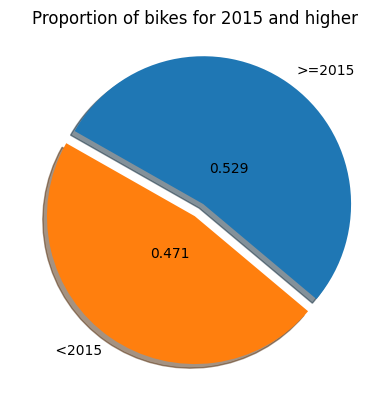

In [11]:
#6 What proportion of bikes are from the year 2015 or older?
import matplotlib.pyplot as plt

def show_proportion(percentage):
  return f"{(percentage/100):0.3f}"


m=df["year"].value_counts(normalize=True)
total =m[m.index>=2015].sum()
plt.pie([total, 1-total] , labels = [">=2015" , " <2015"], explode= ( 0.1,0),shadow = True, startangle =320,autopct =show_proportion,pctdistance =0.3)
plt.title("Proportion of bikes for 2015 and higher")
plt.show()

In [12]:
#7 What is the trend of missing values across the dataset.


df.isna().sum()
df[df["ex_showroom_price"].isna()]["owner"].value_counts()

# there is only one column having 433 which is "ex_showroom_price" it can be happened due to unawareness of exshowroomprice
#or many didnot mention it due to this doesnot affect any other column as its not onroad price , buyer need to pay onroad price and extra
#so they must be focused to give data about onroad price rather than exshowroomprice as it's not the actual price buyer spend


owner
1st owner    366
2nd owner     57
3rd owner      8
4th owner      2
Name: count, dtype: int64

In [13]:
#8  What is the highest ex_showroom_price recorded, and for which bike?

df[df["ex_showroom_price"]==df["ex_showroom_price"].max()]

#noted for "Harley-Davidson Street Bob"
#price recorded  = 1278000.0

name  selling_price  year seller_type      owner  \
134  Harley-Davidson Street Bob         750000  2013  Individual  2nd owner   

     km_driven  ex_showroom_price  
134      12000          1278000.0

<ipython-input-14-1282835604>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=countss["seller_type"], y=countss["name"], palette="pastel")


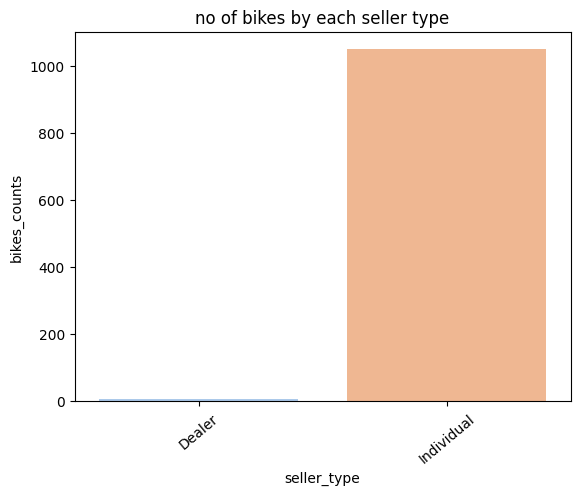

In [14]:
#9 What is the total number of bikes listed by each seller type
countss=df.groupby("seller_type").agg({"name":"count"})
countss.reset_index(inplace=True)

import seaborn as sns
sns.barplot(x=countss["seller_type"], y=countss["name"], palette="pastel")
plt.xlabel("seller_type")
plt.ylabel("bikes_counts")
plt.title("no of bikes by each seller type")
plt.xticks(rotation =40)
plt.show()

 between these two variabel corrrealtion coeffecint is -0.24220488863659748 hence :
#its negative correaltion mean if one increase other decrease , if km_driven is higher the selling price will decrease  


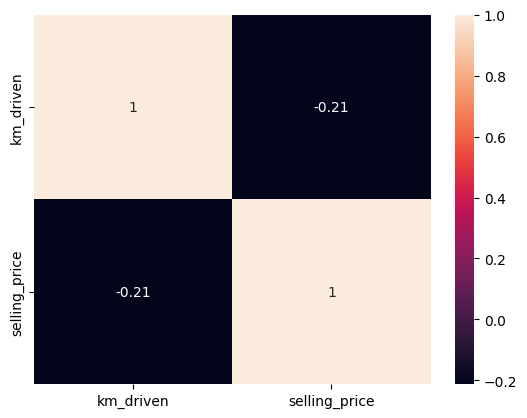

In [15]:
#10 What is the relationship between selling_price and km_driven for first-owner bikes

coornum =df[df["owner"]=="1st owner"]["selling_price"].corr(df[df["owner"]=="1st owner"]["km_driven"])
corr = df[["km_driven", "selling_price"]].corr()
sns.heatmap(corr,annot=True)

print(f" between these two variabel corrrealtion coeffecint is {coornum} hence :\n#its negative correaltion mean if one increase other decrease , if km_driven is higher the selling price will decrease  ")
#its negative correaltion mean if one increase other decrease , if km_driven is higher the selling price will decrease

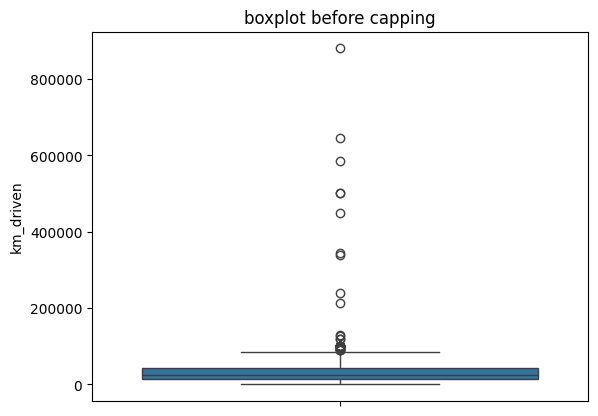

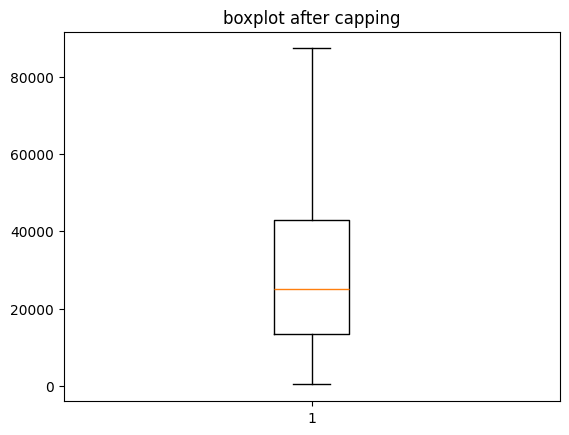

In [16]:
#11 Identify and remove outliers in the km_driven column using the IQR method
import numpy as np
sns.boxplot(df["km_driven"])
plt.title("boxplot before capping")
plt.xlabel("")
plt.show()
Q1 = np.quantile(df["km_driven"], 0.25)
Q3 = np.quantile(df["km_driven"], 0.75)
IQR = Q3 - Q1

mincap =Q1-1.5*IQR
maxcap = Q3+1.5*IQR

df["km_driven"]=np.where(df["km_driven"]<mincap ,mincap , np.where(df["km_driven"]> maxcap , maxcap , df["km_driven"]))

plt.boxplot(df["km_driven"])
plt.title("boxplot after capping")
plt.show()

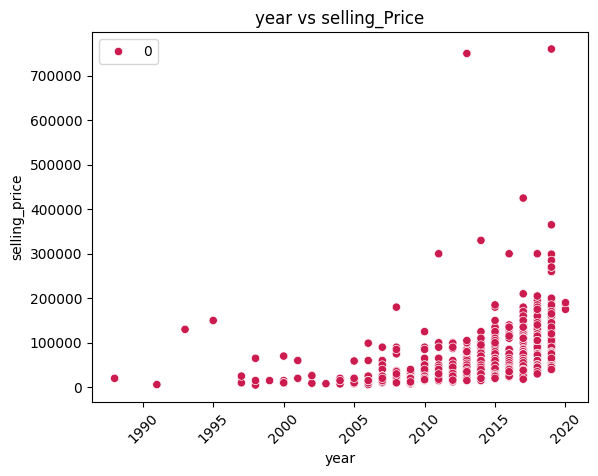

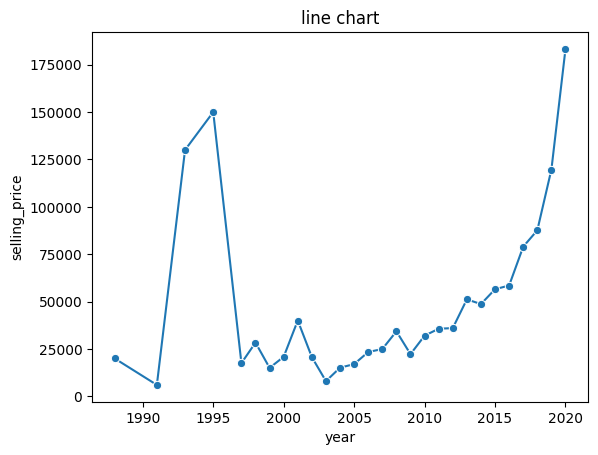

In [17]:
#12 Perform a bivariate analysis to visualize the relationship between year and selling_price


sns.scatterplot( x = df["year"] , y = df["selling_price"] , data =df , palette ="rocket",hue =0)
plt.title("year vs selling_Price")
plt.xticks(rotation=45)
plt.show()

#from graph we can observe as year increaess mean new modal cars have high selling price as data points at higher year is more higher

df_year=df.groupby("year")["selling_price"].mean().reset_index()

sns.lineplot(x="year" , y = "selling_price" , data =df_year , marker = "o")
plt.title("line chart")
plt.show()

#as in linecahr u can seea vearge value is higheer as incraes year and that peak at 1995 cause by very few cars so that it can have diffrnt reason


In [18]:
#13 What is the average depreciation in selling price based on the bike's age (current year - manufacturing year).

df["depreciation"]= df["ex_showroom_price"]-df["selling_price"]
def avg(item):
  return item.mean()
final=df.groupby("year")["depreciation"].apply(avg)
final

year
1988             NaN
1991             NaN
1993             NaN
1995             NaN
1997             NaN
1998             NaN
1999             NaN
2000             NaN
2001    34852.000000
2002             NaN
2003             NaN
2004    36852.000000
2005    44852.000000
2006    39664.500000
2007    42399.000000
2008    54732.428571
2009    39070.923077
2010    45698.555556
2011    47102.666667
2012    37317.648649
2013    43227.673077
2014    34505.606061
2015    28013.275000
2016    28328.190476
2017    22360.690476
2018    13023.194805
2019     2954.562500
2020   -34260.000000
Name: depreciation, dtype: float64

In [19]:
#14  Which bike names are priced significantly above the average price for their manufacturing year?

impd=df.groupby("year")["ex_showroom_price"].mean()
#df[df["selling_price"]>(impd[impd.index==df["selling_price"]["year"]]["ex_showroom_price"])]
def check2(item):
  if item["selling_price"] > (impd[impd.index ==item["year"]].values[0]):
    return item["name"]
  else:
    return None

df
bike_names= df[~df.apply(check2,axis =1).isna()]["name"]

bike_names = bike_names.drop_duplicates().values
bike_names = pd.Series(bike_names , name = "bike_names")
bike_names

0                Royal Enfield Classic 350
1      Royal Enfield Classic Gunmetal Grey
2     Royal Enfield Bullet 350 [2007-2011]
3                            Yamaha YZF R3
4                                  Jawa 42
                      ...                 
59                               KTM RC390
60                          Hyosung GT250R
61               Royal Enfield Thunder 350
62                           KTM 390 Duke 
63                      Bajaj Pulsar RS200
Name: bike_names, Length: 64, dtype: object

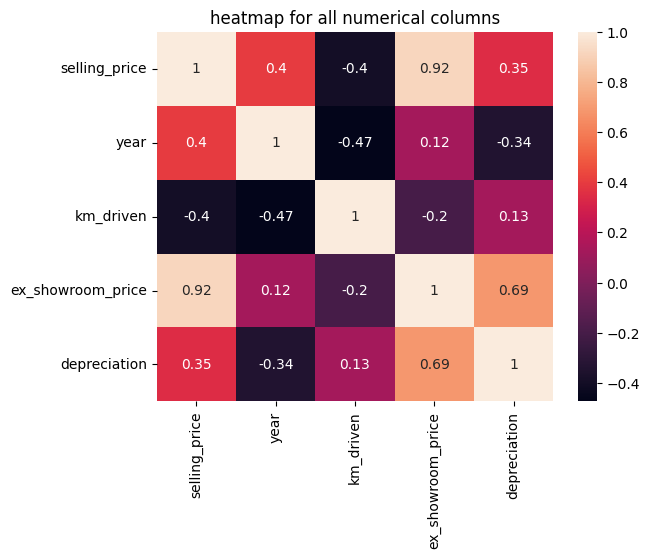

selling_price      year  km_driven  ex_showroom_price  \
selling_price           1.000000  0.400947  -0.399054           0.918659   
year                    0.400947  1.000000  -0.474191           0.124832   
km_driven              -0.399054 -0.474191   1.000000          -0.201191   
ex_showroom_price       0.918659  0.124832  -0.201191           1.000000   
depreciation            0.346646 -0.343829   0.127554           0.689006   

                   depreciation  
selling_price          0.346646  
year                  -0.343829  
km_driven              0.127554  
ex_showroom_price      0.689006  
depreciation           1.000000

In [20]:
#15  Develop a correlation matrix for numeric columns and visualize it using a heatmap.


sns.heatmap(df.corr(numeric_only =True) , annot =True)
plt.title("heatmap for all numerical columns")
plt.show()

df.corr(numeric_only = True)


#EDA-2

In [21]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
import urllib.request as ur
url = f"https://drive.usercontent.google.com/u/0/uc?id=1N0kM_zi-iU3yvr6BEJf21aiF599PtA0U&export=download"
ur.urlretrieve(url,"car_sale.csv")
df = pd.read_csv("car_sale.csv")
df

Car_id        Date Customer Name  Gender  Annual Income  \
0      C_CND_000001    1/2/2022     Geraldine    Male          13500   
1      C_CND_000002    1/2/2022           Gia    Male        1480000   
2      C_CND_000003    1/2/2022        Gianna    Male        1035000   
3      C_CND_000004    1/2/2022       Giselle    Male          13500   
4      C_CND_000005    1/2/2022         Grace    Male        1465000   
...             ...         ...           ...     ...            ...   
23901  C_CND_023902  12/31/2023        Martin    Male          13500   
23902  C_CND_023903  12/31/2023         Jimmy  Female         900000   
23903  C_CND_023904  12/31/2023          Emma    Male         705000   
23904  C_CND_023905  12/31/2023      Victoire    Male          13500   
23905  C_CND_023906  12/31/2023       Donovan    Male        1225000   

                               Dealer_Name    Company       Model  \
0      Buddy Storbeck's Diesel Service Inc       Ford  Expedition   
1                         C & M Motors Inc      Dodge     Durango   
2                              Capitol KIA   Cadillac    Eldorado   
3                   Chrysler of Tri-Cities     Toyota      Celica   
4                        Chrysler Plymouth      Acura          TL   
...                                    ...        ...         ...   
23901                     C & M Motors Inc   Plymouth     Voyager   
23902       Ryder Truck Rental and Leasing  Chevrolet       Prizm   
23903               Chrysler of Tri-Cities        BMW        328i   
23904                    Chrysler Plymouth  Chevrolet       Metro   
23905                      Pars Auto Sales      Lexus       ES300   

                          Engine Transmission       Color  Price ($)  \
0      DoubleÂ Overhead Camshaft         Auto       Black      26000   
1      DoubleÂ Overhead Camshaft         Auto       Black      19000   
2              Overhead Camshaft       Manual         Red      31500   
3              Overhead Camshaft       Manual  Pale White      14000   
4      DoubleÂ Overhead Camshaft         Auto         Red      24500   
...                          ...          ...         ...        ...   
23901          Overhead Camshaft       Manual         Red      12000   
23902  DoubleÂ Overhead Camshaft         Auto       Black      16000   
23903          Overhead Camshaft       Manual         Red      21000   
23904  DoubleÂ Overhead Camshaft         Auto       Black      31000   
23905  DoubleÂ Overhead Camshaft         Auto  Pale White      27500   

       Dealer_No  Body Style    Phone Dealer_Region  
0      06457-3834        SUV  8264678    Middletown  
1      60504-7114        SUV  6848189        Aurora  
2      38701-8047  Passenger  7298798    Greenville  
3      99301-3882        SUV  6257557         Pasco  
4      53546-9427  Hatchback  7081483    Janesville  
...           ...        ...      ...           ...  
23901  60504-7114  Passenger  8583598         Pasco  
23902  06457-3834    Hardtop  7914229    Middletown  
23903  99301-3882      Sedan  7659127    Scottsdale  
23904  53546-9427  Passenger  6030764        Austin  
23905  38701-8047    Hardtop  7020564    Middletown  

[23906 rows x 16 columns]

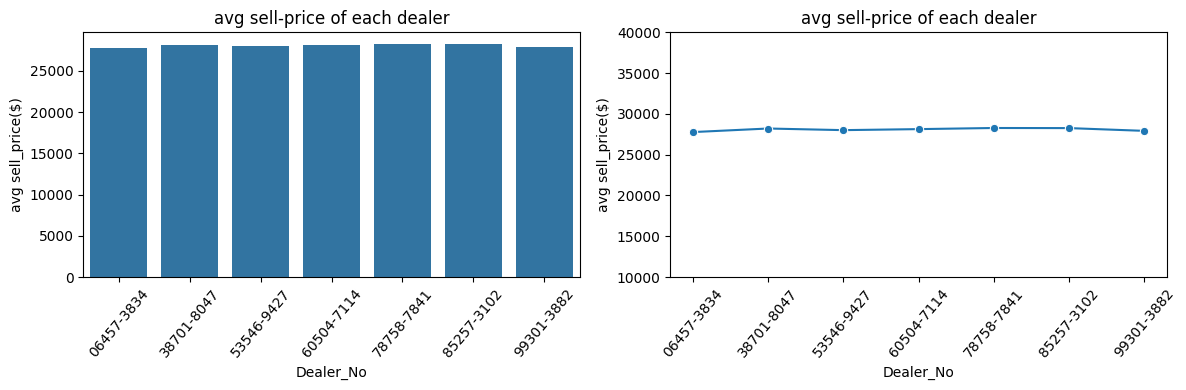

Price ($)
Dealer_No               
06457-3834  27771.614943
38701-8047  28208.618455
53546-9427  28009.712038
60504-7114  28134.025879
78758-7841  28272.412204
85257-3102  28259.141059
99301-3882  27920.853768

In [22]:
#1 What is the average selling price of cars for each dealer, and how does it compare across different dealers.

df.columns = df.columns.str.strip()

dataf =df.groupby("Dealer_No").agg({"Price ($)" : "mean"})

#each dealer has similar average selling price you can see in graph
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.barplot( x = "Dealer_No" , y = "Price ($)" , data = dataf)
plt.xticks(rotation = 50)
plt.title("avg sell-price of each dealer")
plt.ylabel("avg sell_price($)")

plt.subplot(1,2,2)
sns.lineplot(x = "Dealer_No" , y = "Price ($)" , data = dataf ,marker="o")
plt.ylim(10000, 40000)

plt.xticks(rotation = 50)
plt.title("avg sell-price of each dealer")
plt.ylabel("avg sell_price($)")
plt.tight_layout()
plt.show()
#numerical values as dataframe
dataf

<ipython-input-23-3027526529>:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(data=df, x='Company', y='Price ($)' , palette ="rocket")


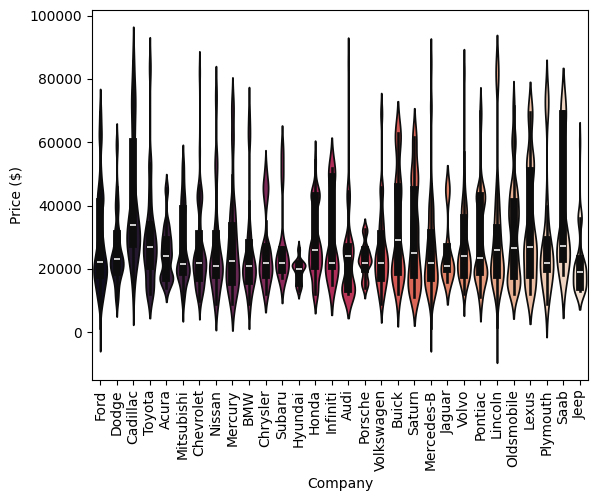

'\ncompany which are high std like lincols,saab,cadillac, plymouth etc\nsell the care with differnt price range form premium to classic\n\nwhile with lower std , are consistent in selling sepcific price range of cars\n\n'

In [23]:
#2 Which car brand (Company) has the highest variation in prices, and what does this tell us about the pricing trends?
def var4(item):
  return item.std()
#m=df.groupby("Company").agg({"Price ($)" : "var"})
j=df.groupby("Company")["Price ($)"].apply(var4)

j.sort_values(ascending=False , inplace = True)
j.name = "std_of_price($)"
#Lincoln has highest variation
sns.violinplot(data=df, x='Company', y='Price ($)' , palette ="rocket")
plt.xticks(rotation = 90)
plt.show()
#conclusions
"""
company which are high std like lincols,saab,cadillac, plymouth etc
sell the care with differnt price range form premium to classic

while with lower std , are consistent in selling sepcific price range of cars

"""



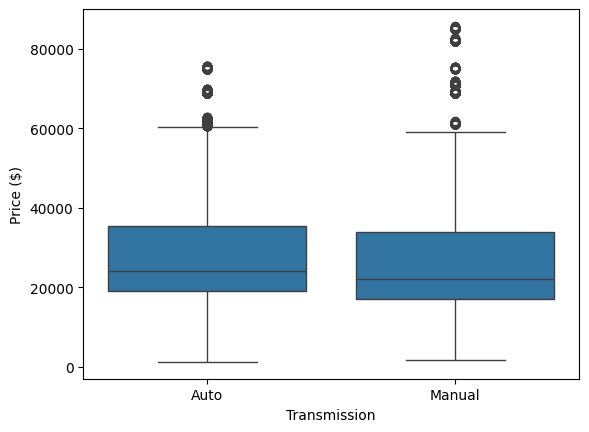


Manual cars have a wider spread in middle 50% of prices.


In [24]:
#3  What is the distribution of car prices for each transmission type, and how do the interquartile ranges compare?
sns.boxplot( x ="Transmission" , y = "Price ($)" , data =df)
plt.show()

iqr1 = np.quantile(df[df["Transmission"]== "Auto"]["Price ($)"], 0.75)-np.quantile(df[df["Transmission"]== "Auto"]["Price ($)"], 0.25)
iqr2 = np.quantile(df[df["Transmission"]== "Manual"]["Price ($)"], 0.75)-np.quantile(df[df["Transmission"]== "Manual"]["Price ($)"], 0.25)
iqr1,iqr2

if iqr1 > iqr2:
    print("Automatic cars have a wider spread in middle 50% of prices. \nhence it gives wider range acc to market ")
elif iqr1 < iqr2:
    print("\nManual cars have a wider spread in middle 50% of prices.")
else:
    print("Both transmission types have similar IQRs.")

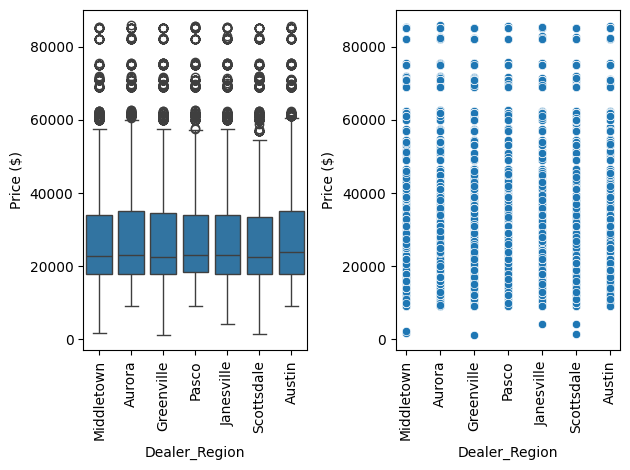

count          mean           std     min      25%      50%  \
Dealer_Region                                                                 
Aurora         3130.0  28334.626837  15026.207252  9000.0  18001.0  23000.0   
Austin         4135.0  28341.603628  14903.884549  9000.0  18001.0  23801.0   
Greenville     3128.0  28180.819054  15101.538328  1200.0  18001.0  22500.0   
Janesville     3821.0  27833.350955  14344.995638  4300.0  18001.0  23000.0   
Middletown     3128.0  27856.338875  14619.842395  1700.0  18000.0  22750.0   
Pasco          3131.0  28119.039923  14659.315941  9000.0  18500.5  23000.0   
Scottsdale     3433.0  27954.958928  14902.916820  1450.0  18000.0  22600.0   

                   75%      max  
Dealer_Region                    
Aurora         35000.0  85800.0  
Austin         35001.0  85601.0  
Greenville     34500.0  85200.0  
Janesville     34000.0  85400.0  
Middletown     34000.0  85300.0  
Pasco          34000.0  85600.0  
Scottsdale     33500.0  85001.0

In [25]:
#4 What is the distribution of car prices across different regions.
plt.subplot(1,2,1)
sns.boxplot(x = df["Dealer_Region"], y = df["Price ($)"] , data =df)
plt.xticks(rotation = 90)
plt.subplot(1,2,2)

sns.scatterplot(x = df["Dealer_Region"], y = df["Price ($)"] , data =df)
plt.xticks(rotation =90)
plt.tight_layout()
plt.show()

df.groupby('Dealer_Region')['Price ($)'].describe()



<ipython-input-26-1325311182>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x="Body Style", data=df, palette="pastel")


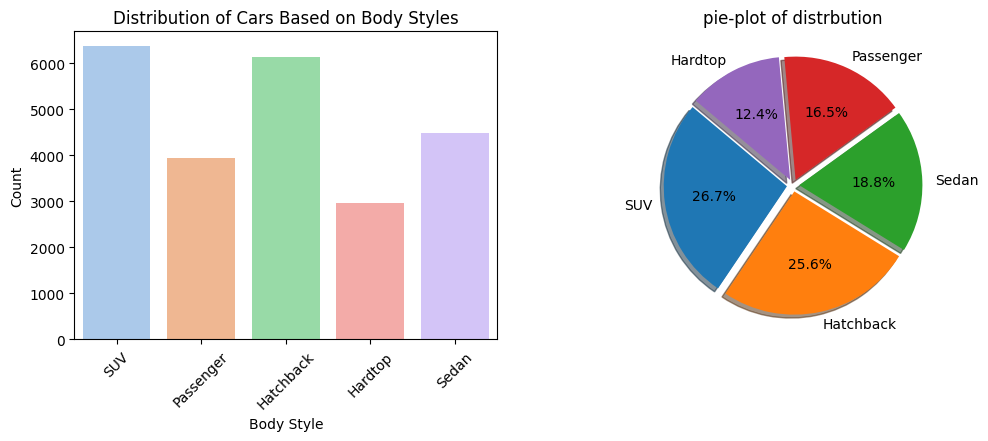

"'\nsuv have highest number of cars gnrly it is known for its rough and tough uses\npaseenger type also have good percentage which shows many people still rely on passengar vehihcles and they probably dont own vehicles\n\n"

In [26]:
#5  What is the distribution of cars based on body styles?

body_counts = df["Body Style"].value_counts()
plt.figure(figsize = (12,4))
plt.subplot(1,2,1)
sns.countplot(x="Body Style", data=df, palette="pastel")

plt.title("Distribution of Cars Based on Body Styles")
plt.xlabel("Body Style")
plt.ylabel("Count")
plt.xticks(rotation=45)  # Rotate labels if they overlap

plt.subplot(1,2,2)
plt.title("pie-plot of distrbution")
plt.pie(body_counts, labels = body_counts.index , autopct = "%1.1f%%" , startangle = 140 ,explode = [0.05,0.05,0.05,0.05,0.05] , shadow = True)

plt.show()

#conclusion
''''
suv have highest number of cars gnrly it is known for its rough and tough uses
paseenger type also have good percentage which shows many people still rely on passengar vehihcles and they probably dont own vehicles

'''

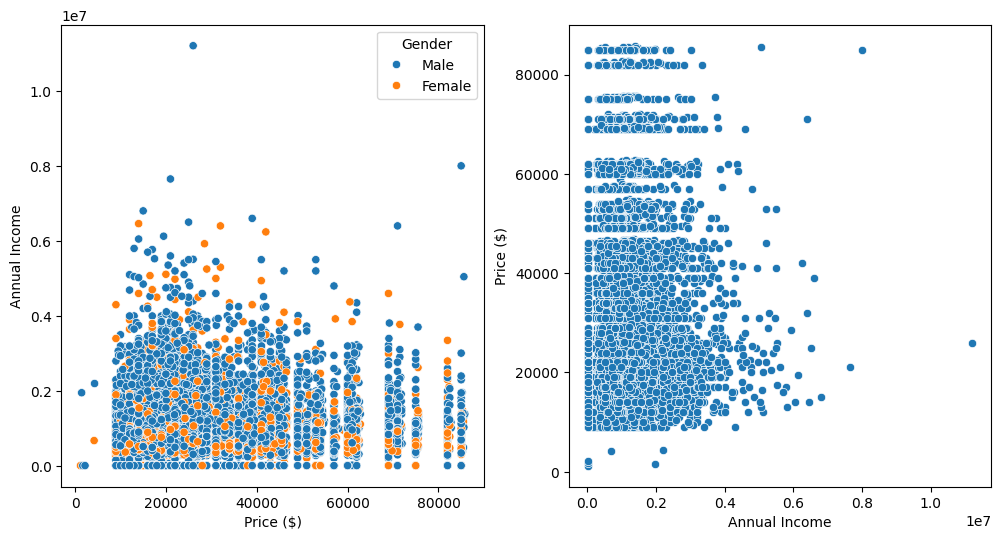

<Axes: xlabel='Gender', ylabel='Price ($)'>

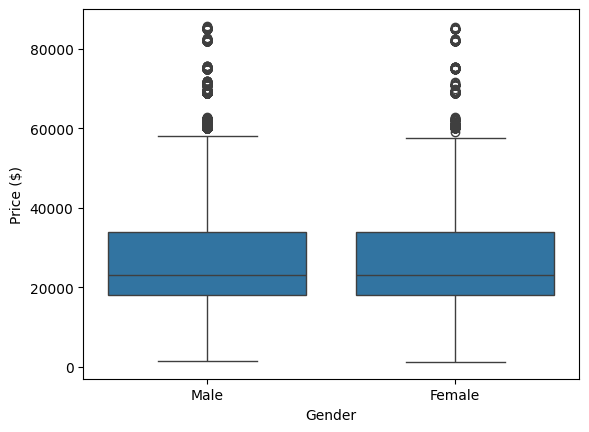

In [27]:
#6 How does the average selling price of cars vary by customer gender and annual income?
import plotly.express as px
plt.figure(figsize = (12,6))
final=df.groupby("Gender").agg({"Price ($)" :"mean"})
#female and male have similar averaeg selling price with female dominating it

plt.subplot(1,2,1)
sns.scatterplot(x = "Price ($)" , y = "Annual Income" , data = df, hue = "Gender")


final2=df.groupby(["Annual Income"]).agg({"Price ($)" : "mean"})
plt.subplot(1,2,2)

sns.scatterplot(x = "Annual Income" , y = "Price ($)" , data =df)
plt.show()
#there is nno increase of selling price as increse of annual income
#mean choice of choosing vehicle doesnot depending on selling price
df["Annual Income"].corr(df["Price ($)"]) #very less so annual income doesnot speciifcaly depend on _price

#letsee female and male with higher income and their purchasing power

sns.boxplot(x = "Gender" , y ="Price ($)" , data = df)




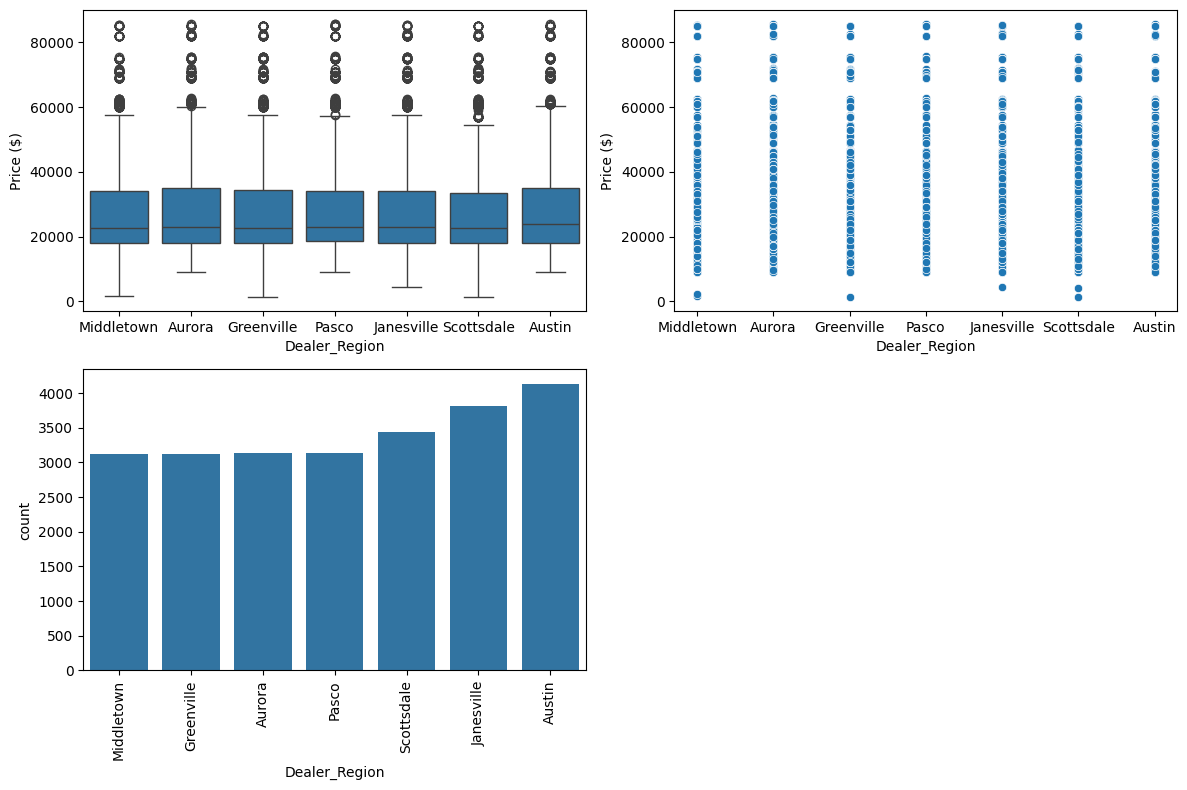

In [28]:
# 7  What is the distribution of car prices by region, and how does the number of cars sold vary by region?
plt.figure(figsize = (12,8))
plt.subplot(2,2,1)
sns.boxplot(x="Dealer_Region" , y= "Price ($)",  data =df )

#from this we can conclude that in middle town car with low price are also getting sold  and covering upto max hence midddle ttown covering wide rang eof car prices from low to high
#same is true for scottsdale and Greenville
#and this opposite hold true for aurora, pasco , austin
plt.subplot(2,2,2)

sns.scatterplot(x="Dealer_Region" , y= "Price ($)",  data =df)
plt.subplot(2,2,3)

#how does no of cars sold vary by region
#austin have higehest no of cars sold followed by janesviile then followed by scottsdale

sns.countplot(x=df["Dealer_Region"],order = df["Dealer_Region"].value_counts(ascending = True).index)
plt.xticks(rotation =90)
plt.tight_layout()
plt.show()

Engine
DoubleÂ Overhead Camshaft    28248.525972
Overhead Camshaft            27914.710631
Name: Price ($), dtype: float64


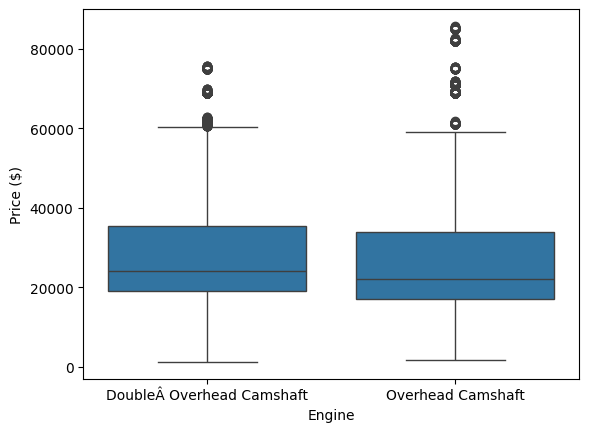

In [29]:
#8  How does the average car price differ between cars with different engine sizes?
df["Engine"].value_counts()
print(df.groupby(df["Engine"])["Price ($)"].mean())

sns.boxplot(x = df["Engine"] , y = df["Price ($)"])
plt.show()
#average price of DoubleÂ Overhead Camshaft    28248.525972,  Overhead Camshaft     27914.710631
#hence avg price of doublea overhead camshaft has mroe average value


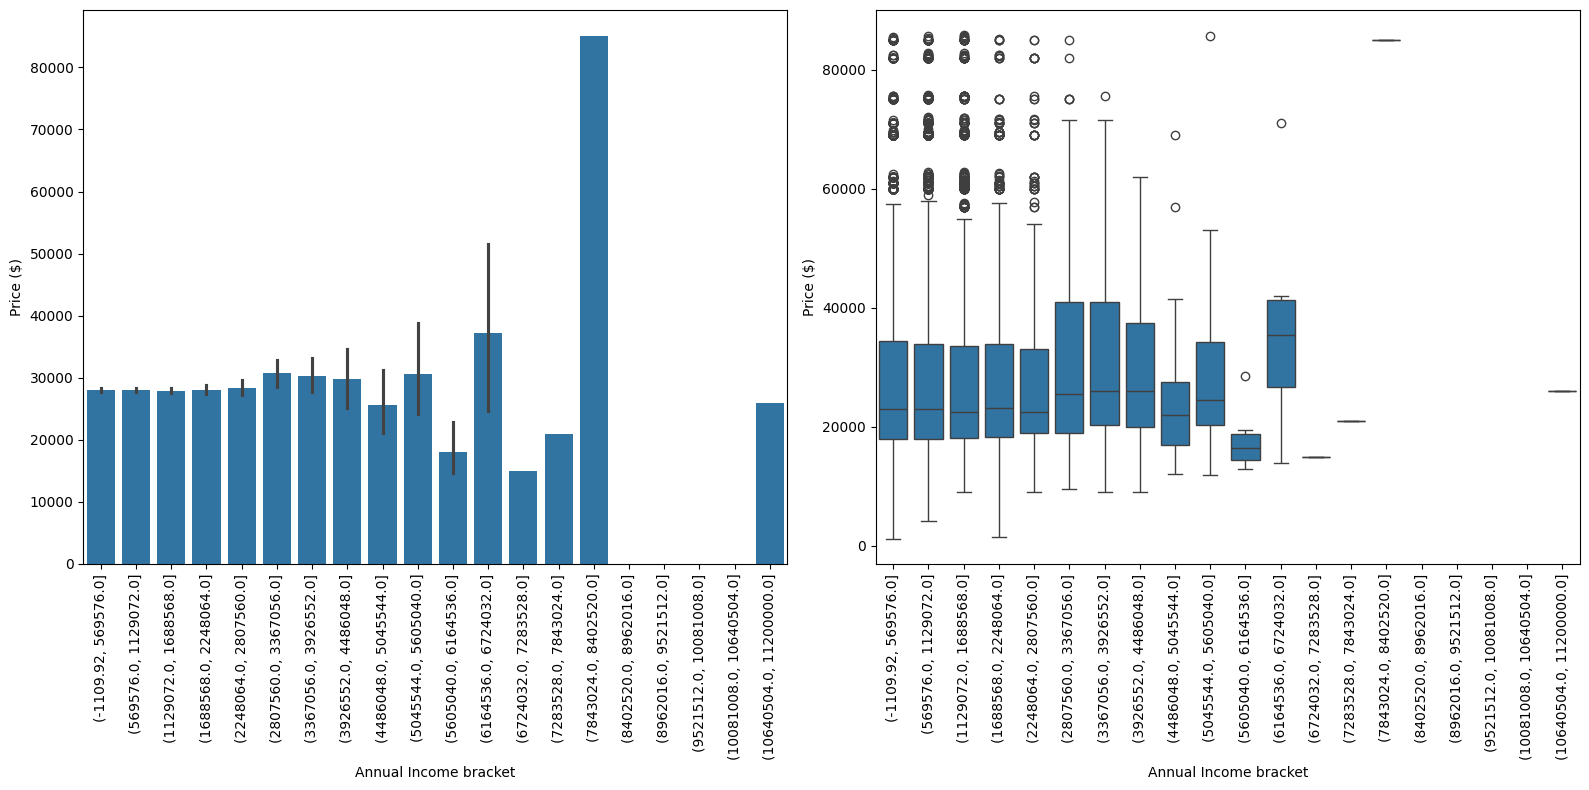

In [30]:
# 9  How do car prices vary based on the customer’s annual income bracket?
plt.figure(figsize =(16,8))
df["Annual Income bracket"] = pd.cut(df["Annual Income"] , bins = 20)
plt.subplot(1,2,1)
sns.barplot(x="Annual Income bracket" , y = "Price ($)" , data =df)

plt.xticks(rotation =90)
#icar prices is highest for customer with annual incomem between (7843024-8402520)
plt.subplot(1,2,2)
sns.boxplot(x="Annual Income bracket" , y = "Price ($)" , data =df)

plt.xticks(rotation = 90)
plt.tight_layout()
plt.show()

#people wiht income less than 2807560 have highest number of higher prices
#mean people with lesser income brackets are having high car prices migh tbe possibel cause its their dream or they wanna look rich

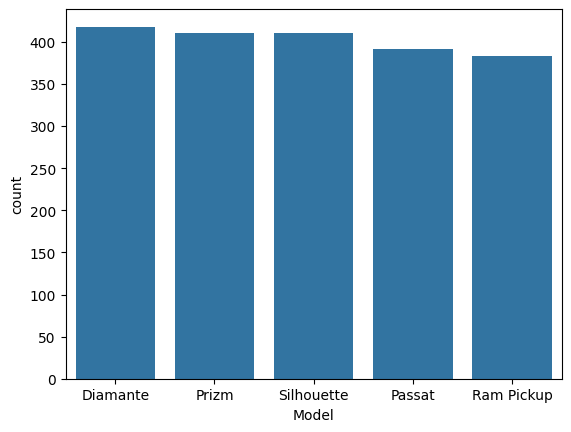

Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383
Name: count, dtype: int64


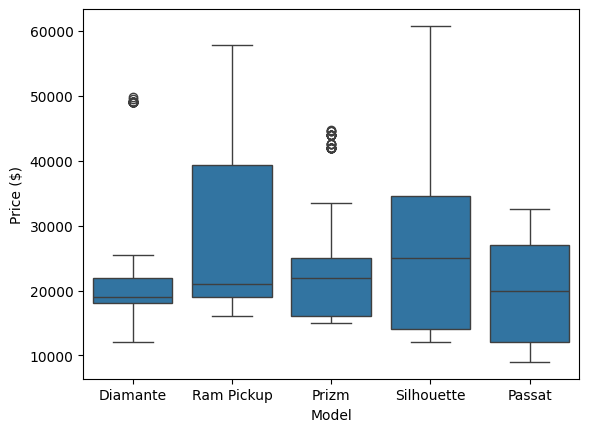

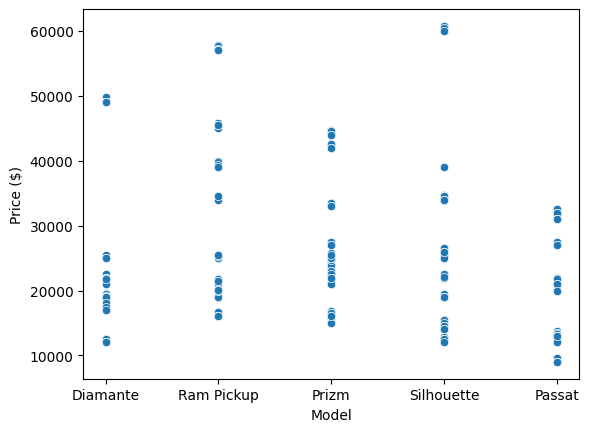

In [31]:
#10  What are the top 5 car models with the highest number of sales, and how does their price distribution look?
sns.barplot(x=df["Model"].value_counts(ascending = False)[0:5].index ,y =df["Model"].value_counts(ascending = False)[0:5])
plt.show()
'''top 5 car mdoeels:
Model
Diamante      418
Prizm         411
Silhouette    411
Passat        391
Ram Pickup    383'''

#sns.boxplot(x=df["Model"].value_counts(ascending = False)[0:5], y = "Price ($)" , data =df )
df4=df["Model"].value_counts(ascending = False)[0:5]
print(df4)
sns.boxplot(x=df[df["Model"].isin(df4.index)]["Model"], y = "Price ($)",data =df)
plt.show()
sns.scatterplot(x=df[df["Model"].isin(df4.index)]["Model"], y = "Price ($)",data =df)
plt.show()

#conclusion
'''
diamanate build for lower price range and not much wider its most of price are in lower range it dont have mid range value
its outliers are too  higly priced

ram pickup covers low to high wide range of price of vehicles
passat is also cosisten in only low range it dont have nay vehicle  higher than 40k dollars
silhouetter is seem to have widest range of price here , from lowest to higehst'''

import plotly.express as px

# Example using your df
fig = px.scatter(
    df,
    x=df[df["Model"].isin(df4.index)]["Model"],
    y=df[df["Model"].isin(df4.index)]["Price ($)"],
    color=df[df["Model"].isin(df4.index)]["Price ($)"],  # or color by density/cluster
    hover_data=[df[df["Model"].isin(df4.index)]["Model"], df[df["Model"].isin(df4.index)]["Price ($)"]]  # customize tooltip
)

fig.show()


In [32]:
#11 How does car price vary with engine size across different car colors, and which colors have the highest price variation?

plt.figure(figsize =(6,6))
import plotly.express as px
fig = px.scatter(df,  x = "Color" , y = "Price ($)" ,color = "Engine" , hover_data = ["Price ($)" , "Engine" , "Color"]  )
fig.show()
ff=df.groupby("Engine").agg( mean_price =("Price ($)" , "mean") , std_price = ("Price ($)" , "std"))
print(ff)
'''
double a overhead camshaft are the ones who have high prices in each color
DoubleÂ Overhead Camshaft  28248.525972  13747.070597 have hig average price mean it has high price and less variation mean
it is expensive than overhead camshaft

as std of red is more so price variation of red is more
'''

df.groupby("Color").agg(
    mean_price=("Price ($)", "mean"),
    std_price=("Price ($)", "std")).sort_values( by = "std_price" , ascending = False)




                             mean_price     std_price
Engine                                               
DoubleÂ Overhead Camshaft  28248.525972  13747.070597
Overhead Camshaft          27914.710631  15862.871978


mean_price     std_price
Color                                 
Red         28736.319007  15519.360962
Black       28564.798015  15286.065976
Pale White  27483.890370  14077.346859

<Figure size 600x600 with 0 Axes>

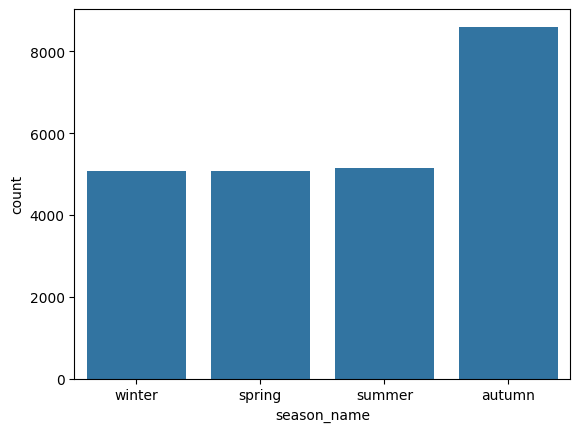

<ipython-input-33-1574601604>:32: FutureWarning:



Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.




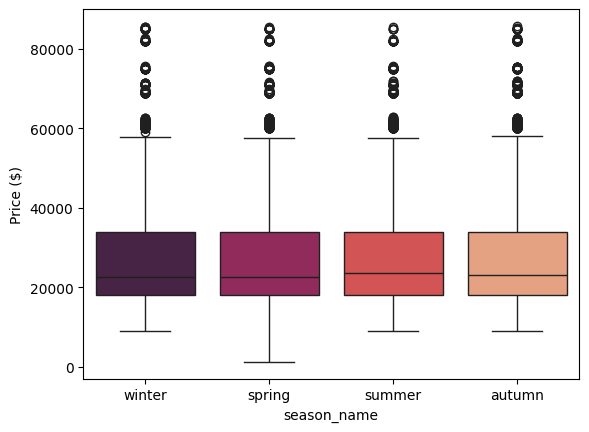

'\nby disturbution u can see spring season have low price ranges car sells too\nTax refunds: Many people get tax refunds in spring, which might lead first-time or budget buyers to shop for affordable cars.\n\nSeasonal promotions: Dealers often run sales to clear out older inventory before new models arrive in late summer/fall, so more cheaper cars are sold.\n\nNew graduates/job starters: Spring is graduation season, so younger buyers or recent graduates may buy cheaper, first cars.\n'

In [33]:
#12 Is there any seasonal trend in car sales based on the date of sale?

df["Date"] = pd.to_datetime(df["Date"] , errors = "coerce")

df["Dealer_Region"].unique()#all are reltaively closer cities so season are same in specific range of months

def itemc(item) :
  if 3<=item["Date"].month<=5:
    return "spring"
  elif 6<=item["Date"].month<=8:
    return "summer"
  elif 9<=item["Date"].month<=11:
    return "autumn"
  else:
    return "winter"



df["season_name"]=df.apply(itemc , axis = 1)

sns.countplot(x=df["season_name"])
plt.show()
'''
this shows at autumn the sells of car are higher than other season this might be due to
people need car  autumn which is gnrly rainy season  so traveling in rain is safe in cars so they buying it before rain start this is one way to think like this
New model releases: Autumn is when many new car models arrive, attracting buyers ready to spend more on latest features.

End-of-year deals: Dealers offer incentives to meet yearly sales goals, including promotions on higher-end cars.

Stable weather: Pleasant autumn weather encourages shopping and test drives.'''

sns.boxplot(data =df , x = "season_name" , y = "Price ($)" , palette = "rocket")
plt.show()

'''
by disturbution u can see spring season have low price ranges car sells too
Tax refunds: Many people get tax refunds in spring, which might lead first-time or budget buyers to shop for affordable cars.

Seasonal promotions: Dealers often run sales to clear out older inventory before new models arrive in late summer/fall, so more cheaper cars are sold.

New graduates/job starters: Spring is graduation season, so younger buyers or recent graduates may buy cheaper, first cars.
'''

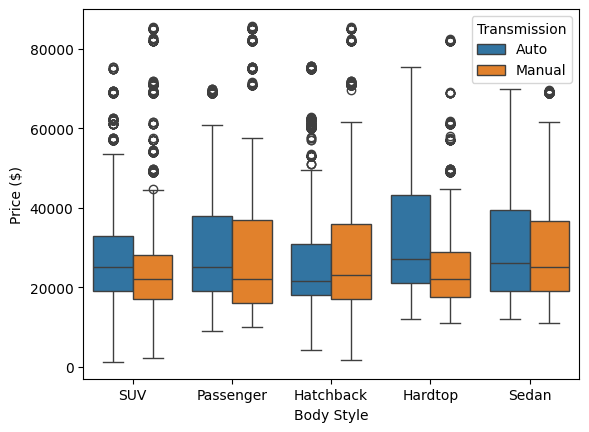

mean_price_transmission  std_price_transmission  \
Transmission Body Style                                                    
Auto         Hardtop                31520.188210            13687.756740   
             Hatchback              25910.544824            13144.014337   
             Passenger              28915.835149            13946.481932   
             SUV                    27501.404407            13299.927913   
             Sedan                  29955.294344            14310.910860   
Manual       Hardtop                27016.943698            14072.501848   
             Hatchback              28702.550562            16284.049616   
             Passenger              28969.521039            18523.684163   
             SUV                    26079.019161            14621.526541   
             Sedan                  29664.271572            15440.056434   

                           min    max  
Transmission Body Style                
Auto         Hardtop     12000  75501  
             Hatchback    4200  75700  
             Passenger    9000  69801  
             SUV          1200  75501  
             Sedan       12000  69980  
Manual       Hardtop     11000  82500  
             Hatchback    1700  85600  
             Passenger   10000  85800  
             SUV          2200  85500  
             Sedan       11000  69700

In [34]:
#13  How does the car price distribution change when considering different combinations of body style and transmission type.

'''
automatic have higher price range and less variation in price as it shows automatic still developin to have variation in wide range of price
and it is genraly expensive than mannual


all body style with automatic transmission have higher average price then mannual one of same body style
except hatchback so after analysing boxplot i came to conclusion that this incrse avg of hatchback due to range of prices of hatchback - auto
which have highest as 70k so that might be considersd peple are prefering hatchback Mannual as compared to auto when it comes to higher price range car
 '''
sns.boxplot(data =df , x= "Body Style" , y = "Price ($)" , hue = "Transmission")
plt.show()
df.groupby(["Transmission" , "Body Style"]).agg( mean_price_transmission = ("Price ($)" , "mean"), std_price_transmission =("Price ($)", "std"), min = ("Price ($)","min") , max =("Price ($)","max"))



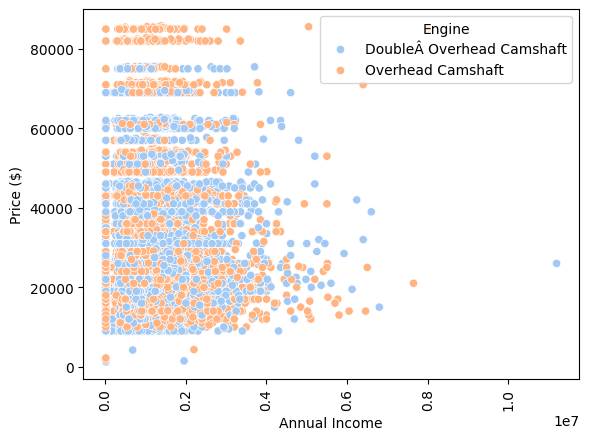

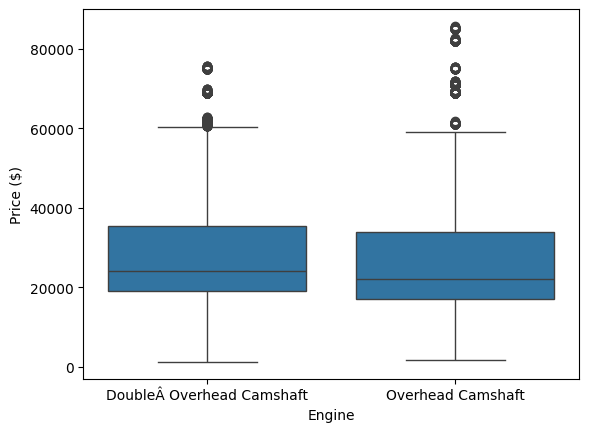

'\navg price of doubler overhead camshft engien is more and it has less variation in price range and\nhighly priced cars falls into overhead camshaft engine '

In [35]:
#14 What is the correlation between car price, engine size, and annual income of customers, and how do these features interact?


import plotly.express as pe
fig= pe.scatter_3d(df, x ="Annual Income" , y ="Price ($)" , z = "Engine" , hover_data =["Engine" ,"Price ($)" , "Annual Income"] , color ="Engine")
fig.show()

sns.scatterplot(data =df, x = "Annual Income", y = "Price ($)" , hue ="Engine" , palette = "pastel")
plt.xticks(rotation = 90)
plt.show()
'''Visually,  scatter plot appears to show that higher incomes are not associated with higher car prices; in fact, most high-priced cars are bought by people with lower or moderate incomes, and very few high-income customers buy expensive cars.'''
#df["Annual Income"].corr(df["Price ($)"])
sns.boxplot(data =df, x = "Engine", y = "Price ($)" )
plt.show()
df.groupby("Engine").agg(mean = ("Price ($)" ,"mean") , std = ("Price ($)" , "std"), median =("Price ($)" , "median"))
'''
avg price of doubler overhead camshft engien is more and it has less variation in price range and
highly priced cars falls into overhead camshaft engine '''


In [36]:
#15 How does the average car price vary across different car models and engine types?

data15=df.groupby(["Engine" , "Model"])["Price ($)"].mean()
pd.DataFrame(data15)
print(data15)


df["Engine"] = df["Engine"].str.strip()  # removes leading/trailing whitespace
df["Engine"] = df["Engine"].str.replace("\xa0", " ", regex=False)  # replaces non-breaking space

data151,data152=df[df["Engine"]=="DoubleÂ Overhead Camshaft"].groupby("Model")["Price ($)"].mean() ,df[df["Engine"]=="Overhead Camshaft"].groupby("Model")["Price ($)"].mean()

data152.name ="data of double type engine"
data151.name ="data of single type engine "
x=pd.concat([data151.describe(),data152.describe()], axis =1 )
print(x)
m=df[df["Engine"]=="DoubleÂ Overhead Camshaft"]["Model"].unique()
k=df[df["Engine"]=="Overhead Camshaft"]["Model"].unique()
j = set(m)&set(k)
common_models = set(j)  # your external list
filtered_df = df[df["Model"].isin(common_models)]
grouped = filtered_df.groupby("Engine")["Price ($)"].mean()


grouped


#j= j[].map(df["Engine"])



Engine                     Model   
DoubleÂ Overhead Camshaft  3-Sep       37986.380117
                           3000GT      22764.326923
                           300M        21394.888889
                           323i        16744.632287
                           328i        21069.149606
                                           ...     
Overhead Camshaft          Viper       26052.375000
                           Voyager     33995.678322
                           Windstar    17100.272727
                           Wrangler    18742.942029
                           Xterra      31072.500000
Name: Price ($), Length: 261, dtype: float64
       data of single type engine   data of double type engine
count                   133.000000                  128.000000
mean                  27785.804929                27662.850766
std                    9807.018004                10705.026066
min                    9063.368421                11069.882353
25%                   20867.4918

Engine
DoubleÂ Overhead Camshaft    27849.240464
Overhead Camshaft            28011.959293
Name: Price ($), dtype: float64

#EDA-3

In [37]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as pe
import urllib.request as ur

url = f"https://drive.usercontent.google.com/u/0/uc?id=1yKlW0x5yyRQijmWbEg5YCsq4wqLl3_oB&export=download"
ur.urlretrieve(url , "amazon_sales_data.csv")

df = pd.read_csv("amazon_sales_data.csv")
df["discounted_price"]=df["discounted_price"].str.replace(r"[₹,]" ,"" , regex =True).str.strip()


doing data cleaning

In [38]:
df["discounted_price"]=df["discounted_price"].astype(float)

df["actual_price"] = df["actual_price"].str.replace(r"[₹,]","" , regex=True).str.strip()



In [39]:
df["actual_price"]=df["actual_price"].astype(float)

In [40]:
df["discount_percentage"]=df.discount_percentage.str.replace(r"[%]" , "" , regex =True).str.strip()

In [41]:
df["discount_percentage"]=df["discount_percentage"].astype(float)

In [42]:
df["rating"]=pd.to_numeric(df["rating"],errors = "coerce")

In [43]:
df["rating"].astype(float)
df["rating_count"].unique()

array(['24,269', '43,994', '7,928', ..., '468', '8,031', '6,987'],
      dtype=object)

In [44]:
df["rating_count"]=df.rating_count.str.replace(r"[,]" ,"", regex =True).str.strip()

In [45]:
df["rating_count"]=pd.to_numeric(df["rating_count"])

In [46]:
df[[i for i in df.columns if df[i].dtypes=="object"]]

product_id                                       product_name  \
0     B07JW9H4J1  Wayona Nylon Braided USB to Lightning Fast Cha...   
1     B098NS6PVG  Ambrane Unbreakable 60W / 3A Fast Charging 1.5...   
2     B096MSW6CT  Sounce Fast Phone Charging Cable & Data Sync U...   
3     B08HDJ86NZ  boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...   
4     B08CF3B7N1  Portronics Konnect L 1.2M Fast Charging 3A 8 P...   
...          ...                                                ...   
1460  B08L7J3T31  Noir Aqua - 5pcs PP Spun Filter + 1 Spanner | ...   
1461  B01M6453MB  Prestige Delight PRWO Electric Rice Cooker (1 ...   
1462  B009P2LIL4  Bajaj Majesty RX10 2000 Watts Heat Convector R...   
1463  B00J5DYCCA  Havells Ventil Air DSP 230mm Exhaust Fan (Pist...   
1464  B01486F4G6  Borosil Jumbo 1000-Watt Grill Sandwich Maker (...   

                                               category  \
0     Computers&Accessories|Accessories&Peripherals|...   
1     Computers&Accessories|Accessories&Peripherals|...   
2     Computers&Accessories|Accessories&Peripherals|...   
3     Computers&Accessories|Accessories&Peripherals|...   
4     Computers&Accessories|Accessories&Peripherals|...   
...                                                 ...   
1460  Home&Kitchen|Kitchen&HomeAppliances|WaterPurif...   
1461  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   
1462  Home&Kitchen|Heating,Cooling&AirQuality|RoomHe...   
1463  Home&Kitchen|Heating,Cooling&AirQuality|Fans|E...   
1464  Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...   

                                          about_product  \
0     High Compatibility : Compatible With iPhone 12...   
1     Compatible with all Type C enabled devices, be...   
2     【 Fast Charger& Data Sync】-With built-in safet...   
3     The boAt Deuce USB 300 2 in 1 cable is compati...   
4     [CHARGE & SYNC FUNCTION]- This cable comes wit...   
...                                                 ...   
1460  SUPREME QUALITY 90 GRAM 3 LAYER THIK PP SPUN F...   
1461                       230 Volts, 400 watts, 1 Year   
1462  International design and styling|Two heat sett...   
1463  Fan sweep area: 230 MM ; Noise level: (40 - 45...   
1464  Brand-Borosil, Specification â€“ 23V ~ 5Hz;1 W...   

                                                user_id  \
0     AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...   
1     AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...   
2     AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...   
3     AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...   
4     AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...   
...                                                 ...   
1460  AHITFY6AHALOFOHOZEOC6XBP4FEA,AFRABBODZJZQB6Z4U...   
1461  AFG5FM3NEMOL6BNFRV2NK5FNJCHQ,AGEINTRN6Z563RMLH...   
1462  AGVPWCMAHYQWJOQKMUJN4DW3KM5Q,AF4Q3E66MY4SR7YQZ...   
1463  AF2JQCLSCY3QJATWUNNHUSVUPNQQ,AFDMLUXC5LS5RXDJS...   
1464  AFGW5PT3R6ZAVQR4Y5MWVAKBZAYA,AG7QNJ2SCS5VS5VYY...   

                                              user_name  \
0     Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...   
1     ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...   
2     Kunal,Himanshu,viswanath,sai niharka,saqib mal...   
3     Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...   
4     rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...   
...                                                 ...   
1460  Prabha ds,Raghuram bk,Real Deal,Amazon Custome...   
1461  Manu Bhai,Naveenpittu,Evatira Sangma,JAGANNADH...   
1462  Nehal Desai,Danish Parwez,Amazon Customer,Amaz...   
1463  Shubham Dubey,E.GURUBARAN,Mayank S.,eusuf khan...   
1464  Rajib,Ajay B,Vikas Kahol,PARDEEP,Anindya Prama...   

                                              review_id  \
0     R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...   
1     RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...   
2     R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...   
3     R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...   
4     R1BP4L2HH9TFUP,R

In [47]:
#yeah after cheiking all object column now all are good with object datatypes no need to cnvert


In [48]:
df.isna().sum()
#we saw one na in rating and 2 in rating_count so letsee those


product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 1
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64

In [49]:
df[df["rating"].isna()]["product_link"].values #i visited the link and saw the rating and updating it its 3.9

df["rating"]=df["rating"].fillna(3.9)


In [50]:
#now time for rating count
df[df["rating_count"].isna()]
#i check in link its 61 for first 2nd 404 error so i would replace it with average mean as there is no outliers

df.at[282,"rating_count"] =61

In [51]:
df["rating_count"]=df["rating_count"].fillna(df.rating_count.mean())

In [52]:
df.drop_duplicates(subset =["product_id"], keep = "last" , inplace =True)

In [53]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 1351 entries, 8 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1351 non-null   object 
 1   product_name         1351 non-null   object 
 2   category             1351 non-null   object 
 3   discounted_price     1351 non-null   float64
 4   actual_price         1351 non-null   float64
 5   discount_percentage  1351 non-null   float64
 6   rating               1351 non-null   float64
 7   rating_count         1351 non-null   float64
 8   about_product        1351 non-null   object 
 9   user_id              1351 non-null   object 
 10  user_name            1351 non-null   object 
 11  review_id            1351 non-null   object 
 12  review_title         1351 non-null   object 
 13  review_content       1351 non-null   object 
 14  img_link             1351 non-null   object 
 15  product_link         1351 non-null   object

cleaning done question started

In [54]:
#1  What is the average rating for each product category?

df.groupby("category")["rating"].mean()

category
Car&Motorbike|CarAccessories|InteriorAccessories|AirPurifiers&Ionizers                                                    3.800000
Computers&Accessories|Accessories&Peripherals|Adapters|USBtoUSBAdapters                                                   4.150000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCHeadsets                                           3.500000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCMicrophones                                        3.600000
Computers&Accessories|Accessories&Peripherals|Audio&VideoAccessories|PCSpeakers                                           4.050000
                                                                                                                            ...   
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|GelInkRollerballPens        4.250000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|LiquidInkRollerballPens     4.150000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|RetractableBallpointPens    4.300000
OfficeProducts|OfficePaperProducts|Paper|Stationery|Pens,Pencils&WritingSupplies|Pens&Refills|StickBallpointPens          4.133333
Toys&Games|Arts&Crafts|Drawing&PaintingSupplies|ColouringPens&Markers                                                     4.300000
Name: rating, Length: 211, dtype: float64

In [55]:
#2  What are the top rating_count products by category

categorywise=df.groupby("category")["rating_count"].max()

categorywise
lst=[]
for i,j in zip(categorywise.index , categorywise.values):
  lst.append(list(df[(df["rating_count"]==j) & (df["category"]==i)]["product_name"].values))


lst

[['Reffair AX30 [MAX] Portable Air Purifier for Car, Home & Office | Smart Ionizer Function | H13 Grade True HEPA Filter [Internationally Tested] Aromabuds Fragrance Option - Black'],
 ['rts [2 Pack] Mini USB C Type C Adapter Plug, Type C Female to USB A Male Charger Charging Cable Adapter Converter compatible for iPhone, Samsung S20 ultra/S21/S10/S8/S9/MacBook Pro iPad Silver'],
 ['Hp Wired On Ear Headphones With Mic With 3.5 Mm Drivers, In-Built Noise Cancelling, Foldable And Adjustable For Laptop/Pc/Office/Home/ 1 Year Warranty (B4B09Pa)'],
 ['JBL Commercial CSLM20B Auxiliary Omnidirectional Lavalier Microphone with Battery for Content Creation, Voiceover/Dubbing, Recording (Black,Small)'],
 ['Zebronics Zeb Wonderbar 10 USB Powered 2.0 Computer Speaker with RGB Lights'],
 ['Logitech C270 Digital HD Webcam with Widescreen HD Video Calling, HD Light Correction, Noise-Reducing Mic, for Skype, FaceTime, Hangouts, WebEx, PC/Mac/Laptop/MacBook/Tablet - (Black, HD 720p/30fps)'],
 ['LAPSTER

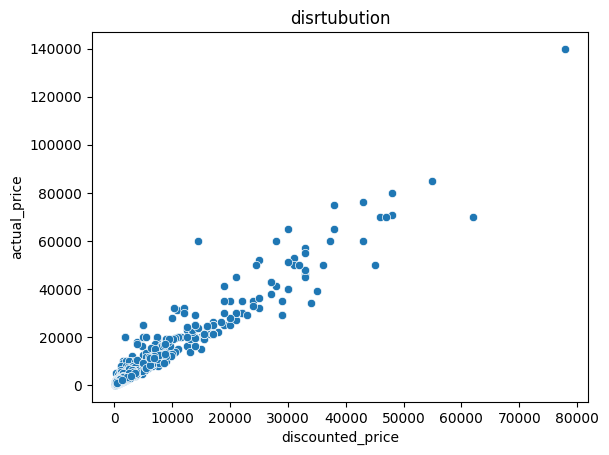

In [56]:
#3  What is the distribution of discounted prices vs. actual prices?

sns.scatterplot(data=df , x= df["discounted_price"], y =df["actual_price"])
plt.title("disrtubution")
plt.xlabel("discounted_price")
plt.ylabel("actual_price")
plt.show()

#it seems linear relationship with distrubution

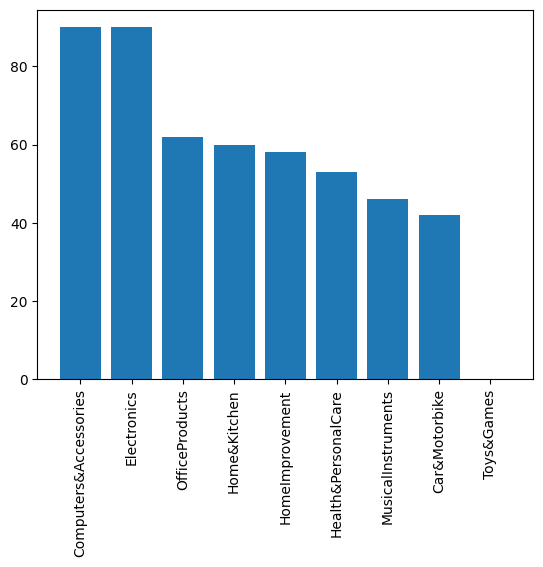

In [57]:
#4  How does the average discount percentage vary across categories?
#analyziing by top level first category
category =df.groupby("category")["discount_percentage"].mean()
idxn = []
for i in category.index:
  idxn.append(i.split("|")[0])

category.index =idxn


plt.bar(category.sort_values(ascending =False).index , category.sort_values(ascending =False).values)
plt.xticks(rotation =90)
plt.show()

#tech products have highest avg discoutn percentgte toys and game dont have nay discount percentage

In [58]:
#5  What are the most popular product names?

#i rhink raitngcount as dirct correlation with popularity mean more no of people


df[df["rating_count"]==(df["rating_count"].max())]["product_name"].values

array(['Amazon Basics High-Speed HDMI Cable, 6 Feet - Supports Ethernet, 3D, 4K video,Black',
       'Amazon Basics High-Speed HDMI Cable, 6 Feet (2-Pack),Black'],
      dtype=object)

In [59]:
#6  What are the most popular product keywords?
from collections import Counter
from nltk.corpus import stopwords
import nltk
nltk.download('stopwords')
import string
df.reset_index(drop =True,inplace =True)
txtdata=df['product_name'].astype(str) + ' ' + df['about_product'].astype(str)
text_data = txtdata.str.lower().str.replace(f"[{string.punctuation}]", " ", regex=True)#mathes [abc] a,b,c eithere one at a time no comma needed in regex =true
stop_words = set(stopwords.words('english'))
for txt in txtdata:
  txt =txt.split()
  tokens = [word for word in txt if word not in stop_words and word.isalpha()]

tokens[0]# most popular product keyword



[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


'Borosil'

In [60]:
#7  What are the most popular product reviews?
df.sort_values(by = "rating_count" , ascending =False).reset_index(drop=True).iloc[0,:]["review_content"]#iloc doesnot care baout index label it give first but loc does

"I am using it for 14 days now. The experience is pretty good as of now. Picture quality is also not bad. Don't expect something out of the world at this price point. But you can go for it if you have a tight budget.,Initial impressions: works as said, glad I didn’t go for cheaper options (not that it’s too costly) just plug and play. Will update if it screws up,The hdmi cable is good to watch movie,sports and its gives better quality while connecting your laptop with TV and play 🎮.I loved it,Works as expected. Length of the cable is short and it was mentioned also satisfied my requirement. If you need more length better look other options.,All good,It's the best HDMI cable at this price range. No problems yet. Just go for it !!,I was expecting this to be delivered on time and it was delivered on time.Product is good as i have tried other cables and wires from Amazon basica brand.,Good one"

In [61]:
#8 What is the correlation between discounted_price and rating?

df["discounted_price"].corr(df["rating"]) #less correlation

np.float64(0.1264376330979692)

In [62]:
#9  What are the Top 5 categories based on the highest ratings?

df.sort_values(by ="rating",ascending =False).iloc[0:5,:]["category"]

661     Computers&Accessories|Accessories&Peripherals|...
114     Computers&Accessories|Accessories&Peripherals|...
264     Computers&Accessories|Accessories&Peripherals|...
1031    Home&Kitchen|Heating,Cooling&AirQuality|WaterH...
1087    Home&Kitchen|Kitchen&HomeAppliances|SmallKitch...
Name: category, dtype: object

In [63]:
#10  Identify any potential areas for improvement or optimization based on the data analysis.
'''
👉 Products with high discount but low rating_count
– Some products have big discounts but aren’t attracting buyers or reviews. Consider promoting these better (ads, bundles).

👉 Products with high rating_count but low rating
– Identify these “popular but disappointing” products. Investigate common complaints and improve product quality or descriptions.

👉 Categories with low engagement
– Some product categories may have very few reviews or ratings overall. Consider category-specific marketing.
'''

'\n👉 Products with high discount but low rating_count\n– Some products have big discounts but aren’t attracting buyers or reviews. Consider promoting these better (ads, bundles).\n\n👉 Products with high rating_count but low rating\n– Identify these “popular but disappointing” products. Investigate common complaints and improve product quality or descriptions.\n\n👉 Categories with low engagement\n– Some product categories may have very few reviews or ratings overall. Consider category-specific marketing.\n'

#EDA-4

In [64]:
import pandas as pd
import numpy as np
import seaborn as sns
import urllib.request as ur
ur.urlretrieve("https://drive.usercontent.google.com/u/0/uc?id=1JVgy2yXUOREkzRdCeWjep626uvvF94pP&export=download" , "spotify.csv")

df = pd.read_csv("spotify.csv")
df

Artist                                         Track Name  \
0             Drake            Rich Baby Daddy (feat. Sexyy Red & SZA)   
1             Drake                                          One Dance   
2             Drake                                 IDGAF (feat. Yeat)   
3             Drake               First Person Shooter (feat. J. Cole)   
4             Drake                      Jimmy Cooks (feat. 21 Savage)   
..              ...                                                ...   
435  French Montana                                    Splash Brothers   
436         Fat Joe                     All The Way Up (feat. Infared)   
437       A$AP Ferg  Work REMIX (feat. A$AP Rocky, French Montana, ...   
438           Diddy                Another One Of Me (feat. 21 Savage)   
439       Rick Ross                                       Stay Schemin   

     Popularity  Duration (ms)                Track ID  
0            92         319191  1yeB8MUNeLo9Ek1UEpsyz6  
1            91         173986  1zi7xx7UVEFkmKfv06H8x0  
2            90         260111  2YSzYUF3jWqb9YP9VXmpjE  
3            88         247444  7aqfrAY2p9BUSiupwk3svU  
4            88         218364  3F5CgOj3wFlRv51JsHbxhe  
..          ...            ...                     ...  
435          44         221863  3fBsEOnzwtlkpS0LxXAZhN  
436          64         191900  7Ezwtgfw7khBrpvaNPtMoT  
437          69         283693  7xVLFuuYdAvcTfcP3IG3dS  
438          65         220408  4hGmQboiou09EwhcTWa0H6  
439          68         267720  0nq6sfr8z1R5KJ4XUk396e  

[440 rows x 5 columns]

In [65]:
#1  Read the dataframe, check null value if present then do the needful, check duplicate row , if present then do the needful.

df.isna().sum() #no null values

df.duplicated().sum()# duplicate is persetn 27

df.drop_duplicates(inplace =True)

df.duplicated().sum()# now no dupllcates are persent


np.int64(0)

<Axes: xlabel='Popularity', ylabel='Count'>

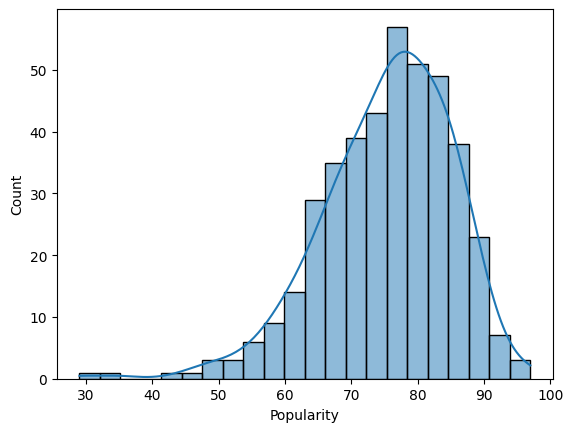

In [66]:
#2  What is the distribution of popularity among the tracks in the dataset? Visualize it using a histogram.
import matplotlib.pyplot as plt

sns.histplot(df["Popularity"],kde =True)
#you can see its negtive skewerd noraml distrubution

<Axes: xlabel='Duration (ms)', ylabel='Popularity'>

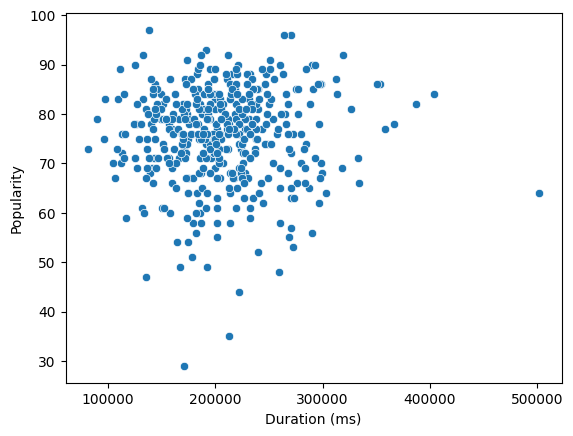

In [67]:
#3  Is there any relationship between the popularity and the duration of tracks? Explore this using a scatter plot

sns.scatterplot(data =df , y=df["Popularity"] ,x= df["Duration (ms)"] )
#mainly les duraion are highly popular u can see usign clsuter

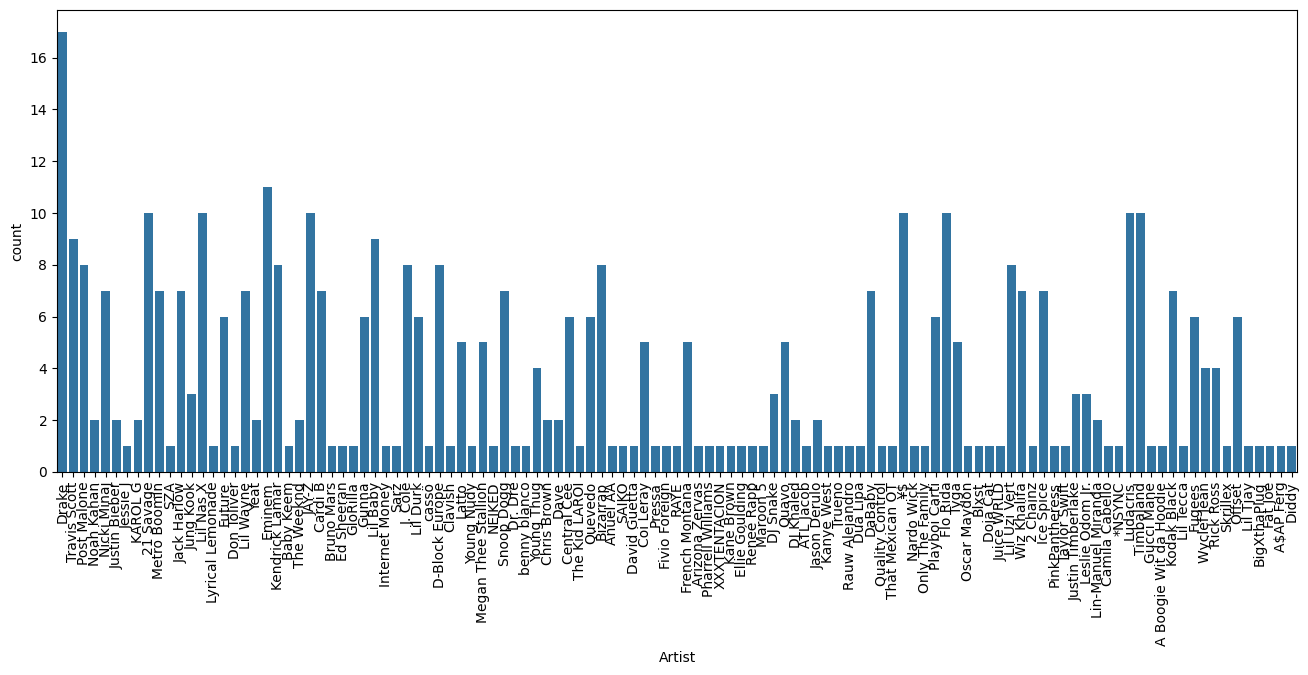

Artist
Drake          4.116223
Eminem         2.663438
Lil Nas X      2.421308
JAY-Z          2.421308
21 Savage      2.421308
                 ...   
Lil Tjay       0.242131
BigXthaPlug    0.242131
Fat Joe        0.242131
A$AP Ferg      0.242131
Diddy          0.242131
Name: proportion, Length: 115, dtype: float64

In [68]:
 #4 Which artist has the highest number of tracks in the dataset? Display the count of tracks for each artist.

plt.figure(figsize = (16,6))
sns.countplot(x=df["Artist"])
plt.xticks(rotation =90)
plt.show()
df["Artist"].value_counts(normalize =True)*100
#drake has highesghest numebr of trakes 17  consisiting of 4% of all

In [69]:
#5  What are the top 5 least popular tracks in the dataset? Provide the artist name and track name for each.

df.sort_values( by ="Popularity" ,ascending =True).iloc[0:5,:][["Artist" ,"Track Name"]]

Artist                     Track Name
207          Pressa  Attachments (feat. Coi Leray)
231   Justin Bieber                     Intentions
413  French Montana                Splash Brothers
225        Lil Baby                  On Me - Remix
407     Wyclef Jean      911 (feat. Mary J. Blige)

In [70]:
#6  Among the top 5 most popular artists, which artist has the highest popularity on average? Calculate and display the average popularity for each artist.

populars =df.sort_values(by ="Popularity" , ascending =False).iloc[0:5,:]["Artist"].values

dfs = df[df["Artist"].isin(populars)]
dfs
dfs.groupby("Artist")["Popularity"].mean()

Artist
21 Savage       83.800000
Drake           82.882353
Jack Harlow     77.714286
Travis Scott    86.555556
¥$              85.100000
Name: Popularity, dtype: float64

In [71]:
#7  For the top 5 most popular artists, what are their most popular tracks? List the track name for each artist.

df.sort_values(by ="Popularity", ascending =False).iloc[0:5,:][["Artist" ,"Track Name"]]

Artist                               Track Name
40    Jack Harlow                              Lovin On Me
260            ¥$                                 CARNIVAL
70      21 Savage                                   redrum
30   Travis Scott               FE!N (feat. Playboi Carti)
0           Drake  Rich Baby Daddy (feat. Sexyy Red & SZA)

<Figure size 1600x600 with 0 Axes>

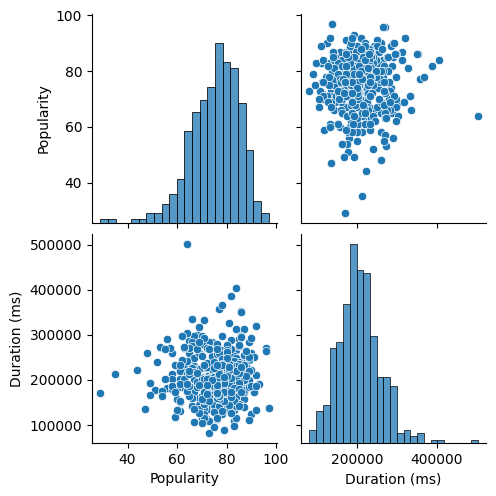

In [72]:
#8  Visualize relationships between multiple numerical variables simultaneously using a pair plot.
plt.figure(figsize = (16,6))
sns.pairplot(df)
plt.show()

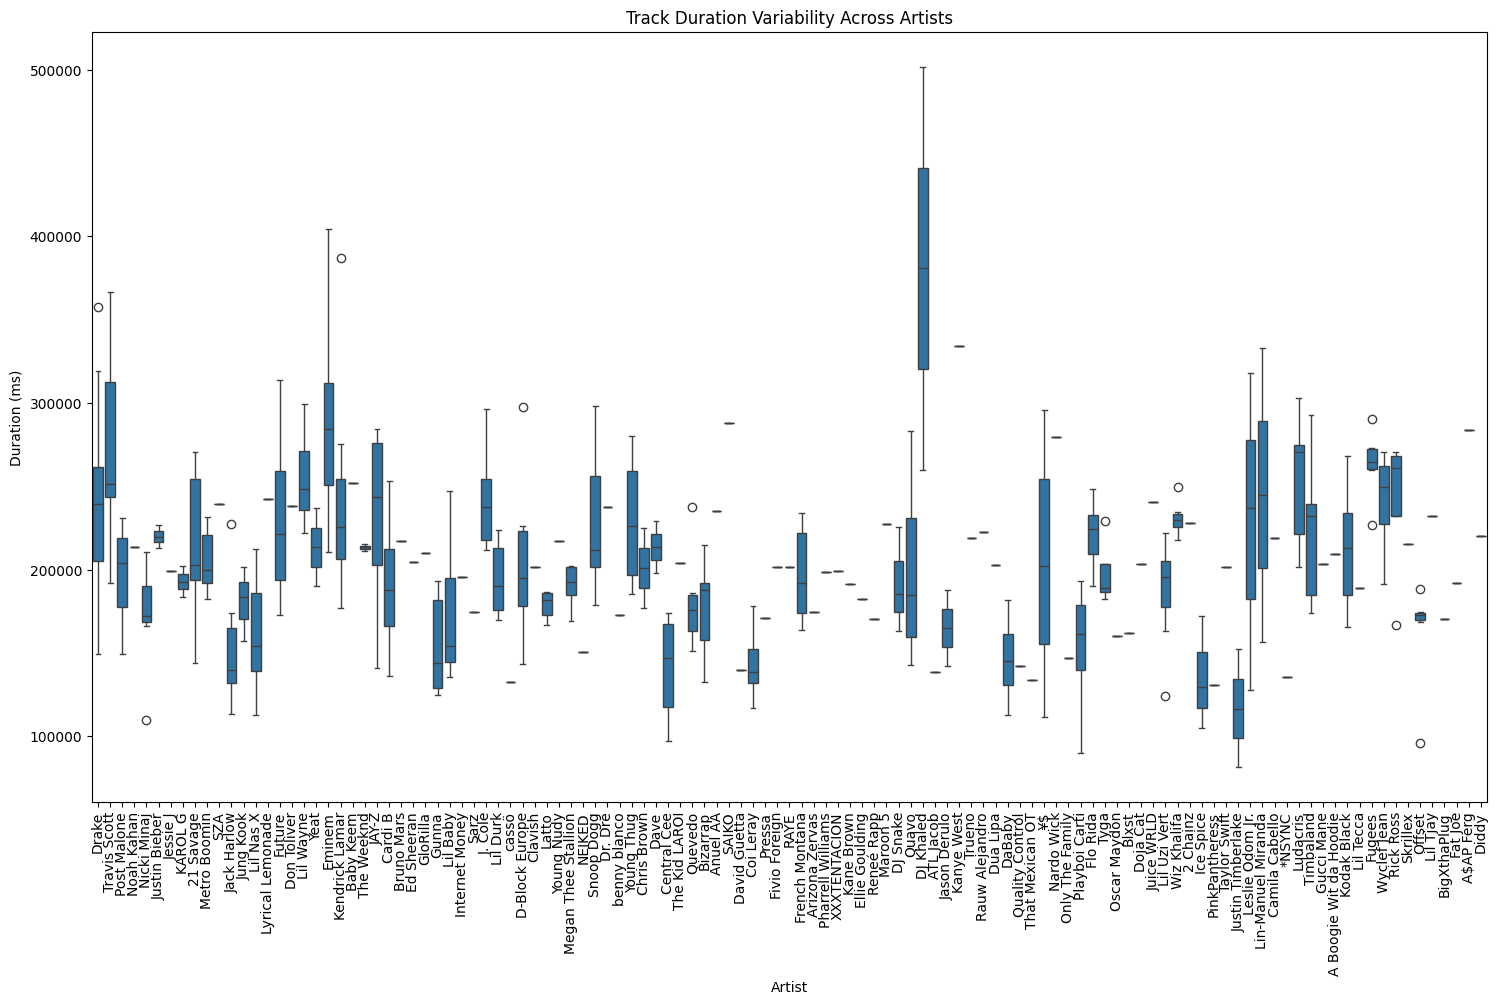

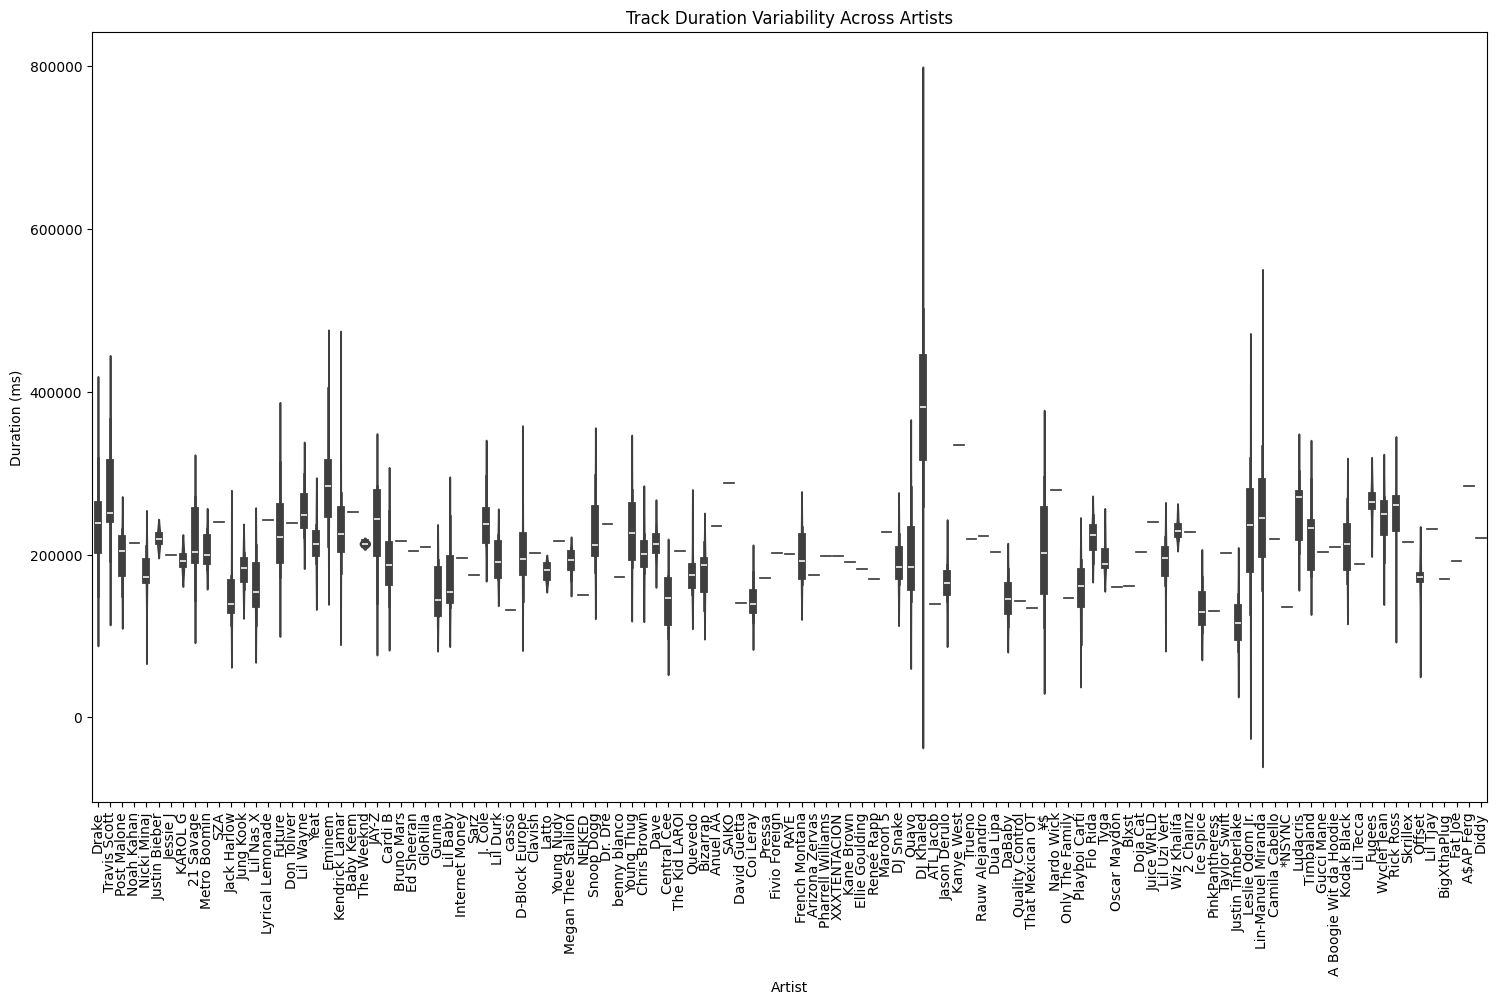

In [104]:
#9 Does the duration of tracks vary significantly across different artists? Explore this visually using a box plot or violin plot.


plots = df.groupby("Artist")["Duration (ms)"].mean()
plots = pd.DataFrame(plots).reset_index()

plt.figure(figsize=(18, 10))
sns.boxplot(data=df, x="Artist", y="Duration (ms)")
plt.xticks(rotation=90)
plt.title("Track Duration Variability Across Artists")
plt.show()

import plotly.express as px
fig = px.box(df, x="Artist", y="Duration (ms)",hover_data=["Artist"])
fig.show()

#violoin plot
plt.figure(figsize=(18, 10))
sns.violinplot(data=df, x="Artist", y="Duration (ms)")
plt.xticks(rotation=90)
plt.title("Track Duration Variability Across Artists")
plt.show()

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

5.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

11.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

25.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

14.3% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categorical.py:3399: UserWarning:

20.0% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

/usr/local/lib/python3.11/dist-packages/seaborn/categori

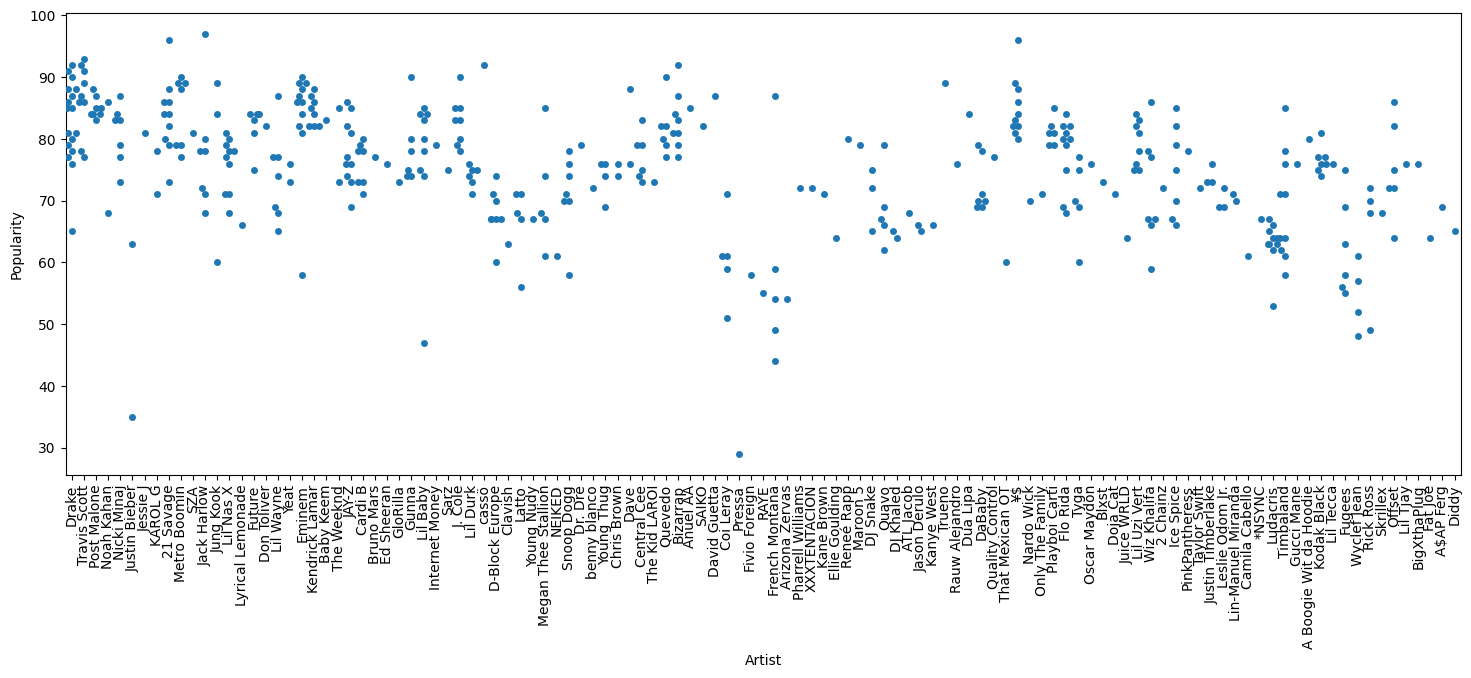

In [109]:
#10 How does the distribution of track popularity vary for different artists? Visualize this using a swarm plot or a violin plot.
plt.figure(figsize= (18,6))
sns.swarmplot(x="Artist", y="Popularity", data=df)
plt.xticks(rotation =90)
plt.show()